# Rigid Rotator Continued...

## Selection Rules

We can determine the selection rules for the rigid rotator to absorb light in the same way we determined them for the harmonic oscillator.  Namely we need to compute the expectation value of the dipole moment, or the transition dipole moment for rotations

$\langle \nu'|\mu_z|\nu\rangle = \int_{-\infty}^{\infty}dx \psi_{\nu'}(x)\mu_z(x)\psi_nu(x)$

$ = \int_0^{2\pi}\int_0^{\pi}Y_{J'}^{m'}(\theta,\phi)^*\mu_zY_{J}^{m}(\theta,\phi)sin\theta d\theta d\phi$

Note that the Jacobian to go from cartesian coordinates to spherical coordinates is $r^2sin\theta$.  Pluggin in $\mu_z = \mu_0\cos\theta$ gives

$\langle J',m'|\mu_z|J,m\rangle = \mu_0\int_0^{2\pi}\int_0^{\pi}Y_{J'}^{m'}(\theta,\phi)^*Y_{J}^{m}(\theta,\phi)\cos\theta\sin\theta d\theta d\phi$.

The above quantity will only be nonzero for $\mu_0\neq 0 $ which means that the molecule must have a permanent dipole moment to have a rotational spectrum.  To determine the selection rules we must use the separated $\phi$ and $\theta$ form of the spherical harmonic

$Y_l^m(\theta,\phi) = i^{m+|m|}N_{Jm}P_J^{|m|}(\cos\theta)e^{im\phi}$.

Plugging this form of $Y$ into the integral above and changing variables $x=\cos\theta$ yields

$\langle J',m'|\mu_z|J,m\rangle = \mu_0N_{J,m}N_{J',m'}\int_0^{2\pi}d\phi e^{i(m-m')\phi}\int_{-1}^{1}dx \quad x P_{J'}^{|m'|}(x)P_J^{|m|}(x)$.

The integral over $\phi$ is zero unless $m'=m$ providing the selection rule $\Delta m = 0$.  By employing the recursion relationship of Legendre polynomials we can evaluate $xP_j^{|m|}$ and determine the other rigid rotor selection rule: $\Delta J = \pm 1$.  

## Rotational Spectrum

Recall that the energy levels of a rigid rotator are given by

$E_J = \frac{\hbar^2}{2I}J(J+1)$.

Note that this leads to unequal spacing of energy levels, unlike the Harmonic oscillator.

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
def define_figure(xlabel="X",ylabel="Y"):
    # setup plot parameters
    fig = plt.figure(figsize=(10,8), dpi= 80, facecolor='w', edgecolor='k')
    ax = plt.subplot(111)
    ax.grid(b=True, which='major', axis='both', color='#808080', linestyle='--')
    ax.set_xlabel(xlabel,size=20)
    ax.set_ylabel(ylabel,size=20)
    plt.tick_params(axis='both',labelsize=20)
    return ax

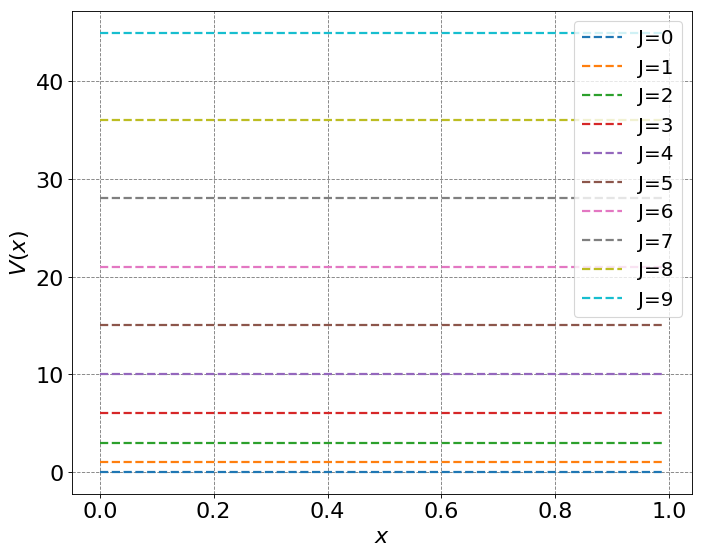

In [18]:
# plot rotational energy levels
ax = define_figure(xlabel="$x$",ylabel="$V(x)$")
hbar = 1.0
mu = 1
x = np.arange(0,1,0.01)
for j in range(10):
    # compute and plot energy levels
    energy = hbar**2/(2*mu)*j*(j+1)
    label = "J=" + str(j)
    ax.plot(x, energy * np.ones(np.shape(x)), '--',lw=2,label=label)
plt.legend(fontsize=18)

# Coupling of a Harmonic Oscillator and Rigid Rotor

If vibrational motion of a diatomic molecule is well described by a harmonic oscillator and rotation of a diatomic molecule is well described by a rigid rotor, the vibrational-rotational spectrum should be (should it?) well described by the combination of these two.  Namely, the energy levels of a diatomic molecule are

$E_{\nu,J} = \left(\nu+\frac{1}{2}\right)h\nu+BJ(J+1)$.

where 

$B = \frac{h}{8\pi^2I}$.

When a molecule that is described by this energy/Hamiltonian absorbs a photon, both selection rules apply

$\Delta \nu = \pm 1$

$\Delta J = \pm 1$.

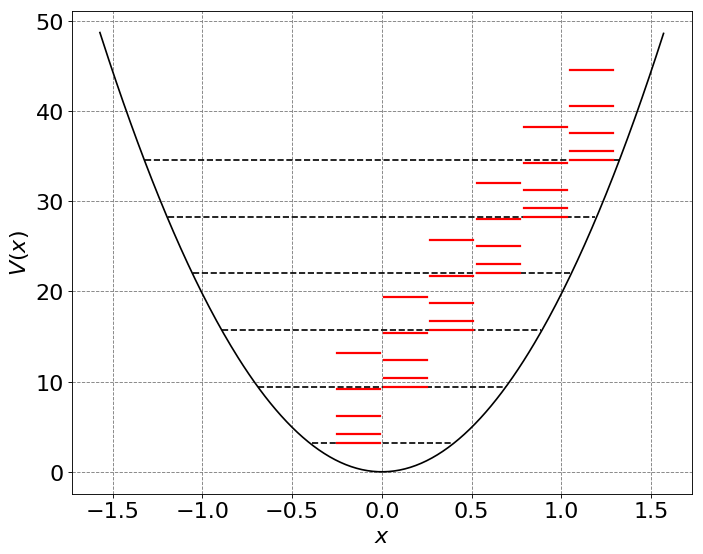

In [27]:
# let's plot the energy levels and wave functions
from scipy.special import hermite
from scipy.special import factorial

# start by defining N function
def Nn(n,alpha):
    return 1/np.sqrt(2**n*factorial(n))*(alpha/np.pi)**0.25

# initialize a figure
ax = define_figure(xlabel="$x$",ylabel="$V(x)$")
hbar = 1.0
omega = 2*np.pi
alpha = omega/np.pi
x = np.arange(-np.pi/2.0,np.pi/2.0,0.01)
x2 = np.power(x,2)
U = 0.5 * (omega)**2 * x**2
ax.plot(x, U, 'k')
xrot = np.arange(-0.25,0,0.01)
for n in range(6):
    # compute and plot energy levels
    evals = hbar*omega*(n+0.5)
    mask = np.where(evals > U)  
    ax.plot(x[mask], evals * np.ones(np.shape(x))[mask], 'k--')
    for j in range(5):
        # compute and plot energy levels
        energy = hbar**2/(2*mu)*j*(j+1) + evals
        ax.plot(xrot, energy * np.ones(np.shape(xrot)), 'r-',lw=2)
    xrot += 0.26
plt.legend(fontsize=18)

The above energy (and Hamiltonian) assume that the vibrational and rotational states are independent.  This is not completely accurate.  This can even be obvserved in rotation-vibration spectra of diatomic molecules.  In order to include the coupling between the two accurately, one must rewrite the Hamiltonian and solve the new Schrodinger equation.  A simple approximation to this is to recognize that the bond length likely increases as vibrational quantum number increases.  Thus B should really depend on vibrational state.  This can be denoted as 

$E_{\nu,J} = \omega(\nu+\frac{1}{2}) + B_\nu J(J+1)$,

where $B_\nu$ denotes that the rotational constant depends on vibrational level $nu$.  This dependence is called the rotation-vibration interaction.  If we consider the $\nu=0\rightarrow1$ transition, then we have an R branch given by

$\nu_R(\Delta J = + 1) = E_{1,J+1} - E_{0,J}$

$ = \frac{3}{2}\omega + B_1(J+1)(J+2) - \frac{1}{2}\omega - B_0 J(J+1)$

$ = \omega + 2B_1+(3B_1-B_0)J + (B_1-B_0)J^2 \quad J=0,1,2,...$.

The P branch is given as 

$\nu_R(\Delta J = - 1) = E_{1,J-1} - E_{0,J}$

$ = \omega - (B_1+B_0)J + (B_1-B_0)J^2 \quad J=1,2,3,...$.